In [5]:
import os
import shutil

# 📁 Rutas base en Kaggle
images_dir = '/kaggle/input/food41/images'
meta_dir = '/kaggle/input/food41/meta/meta'
output_base = '/kaggle/working/food41_split'

# Crear carpetas /train y /test con subcarpetas por clase
for class_name in os.listdir(images_dir):
    os.makedirs(os.path.join(output_base, 'test', class_name), exist_ok=True)

with open(os.path.join(meta_dir, 'test.txt'), 'r') as f:
    test_list = [line.strip() for line in f]

for item in test_list:
    src = os.path.join(images_dir, item + '.jpg')
    dst = os.path.join(output_base, 'test', item.split('/')[0])
    shutil.copy(src, dst)

print("✅ Imágenes reorganizadas correctamente en /kaggle/working/food101_split/test.")


✅ Imágenes reorganizadas correctamente en /kaggle/working/food101_split/test.


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

validation_dir = "/kaggle/working/food41_split/test"

# Para ResNet50 (224x224)
val_gen_resnet = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
).flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Para InceptionV3 (299x299)
val_gen_inception = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
).flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Para Xception (299x299)
val_gen_xception = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input
).flow_from_directory(
    validation_dir,    
    target_size=(299, 299),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 25250 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [13]:
from tensorflow.keras.models import load_model

# Cargar los modelos exportados en formato SavedModel desde Kaggle Models
model_resnet = load_model("/kaggle/input/food-101-rnc-resnet50/keras/default/1/resnet50_food101_best.h5")
model_inception = load_model("/kaggle/input/food-101-rnc-inceptionv3/keras/default/1/inceptionv3_food101.h5")
model_xception = load_model("/kaggle/input/food-101-rnc-xception/keras/default/1/xception_food101.h5")

# Evaluación básica
loss_res, acc_res = model_resnet.evaluate(val_gen_resnet)
loss_inc, acc_inc = model_inception.evaluate(val_gen_inception)
loss_xce, acc_xce = model_xception.evaluate(val_gen_xception)  # Corregido aquí

print(f"✅ ResNet50 - Accuracy: {acc_res:.4f}, Loss: {loss_res:.4f}")
print(f"✅ InceptionV3 - Accuracy: {acc_inc:.4f}, Loss: {loss_inc:.4f}")
print(f"✅ Xception - Accuracy: {acc_xce:.4f}, Loss: {loss_xce:.4f}")

790/790 ━━━━━━━━━━━━━━━━━━━━ 85s 100ms/step - accuracy: 0.6059 - loss: 1.4825
790/790 ━━━━━━━━━━━━━━━━━━━━ 133s 158ms/step - accuracy: 0.6078 - loss: 1.4750


2025-07-10 03:12:56.619329: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=0} for conv (f32[32,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,147,147]{3,2,1,0}, f32[128,128,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-07-10 03:12:56.965495: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.346359974s
Trying algorithm eng3{k11=0} for conv (f32[32,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,147,147]{3,2,1,0}, f32[128,128,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone

790/790 ━━━━━━━━━━━━━━━━━━━━ 268s 313ms/step - accuracy: 0.5985 - loss: 1.5210
✅ ResNet50 - Accuracy: 0.6358, Loss: 1.3592
✅ InceptionV3 - Accuracy: 0.6381, Loss: 1.3420
✅ Xception - Accuracy: 0.6392, Loss: 1.3341


In [14]:
import numpy as np
from sklearn.metrics import classification_report

# Verdaderas etiquetas
y_true = val_gen_resnet.classes

# Predicciones
y_pred_res = np.argmax(model_resnet.predict(val_gen_resnet), axis=1)
y_pred_inc = np.argmax(model_inception.predict(val_gen_inception), axis=1)
y_pred_xce = np.argmax(model_xception.predict(val_gen_xception), axis=1)

# Reporte ResNet
print("📊 Clasificación - ResNet50")
print(classification_report(y_true, y_pred_res))

# Reporte Inception
print("📊 Clasificación - InceptionV3")
print(classification_report(y_true, y_pred_inc))

# Reporte Xception
print("📊 Clasificación - Xception")
print(classification_report(y_true, y_pred_xce))

790/790 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step
790/790 ━━━━━━━━━━━━━━━━━━━━ 126s 154ms/step
790/790 ━━━━━━━━━━━━━━━━━━━━ 251s 313ms/step
📊 Clasificación - ResNet50
              precision    recall  f1-score   support

           0       0.48      0.24      0.32       250
           1       0.52      0.70      0.60       250
           2       0.70      0.60      0.65       250
           3       0.66      0.68      0.67       250
           4       0.52      0.50      0.51       250
           5       0.61      0.44      0.51       250
           6       0.74      0.84      0.79       250
           7       0.76      0.84      0.80       250
           8       0.45      0.36      0.40       250
           9       0.44      0.66      0.53       250
          10       0.54      0.40      0.46       250
          11       0.76      0.60      0.67       250
          12       0.76      0.62      0.69       250
          13       0.62      0.58      0.60       250
          14       0.59     

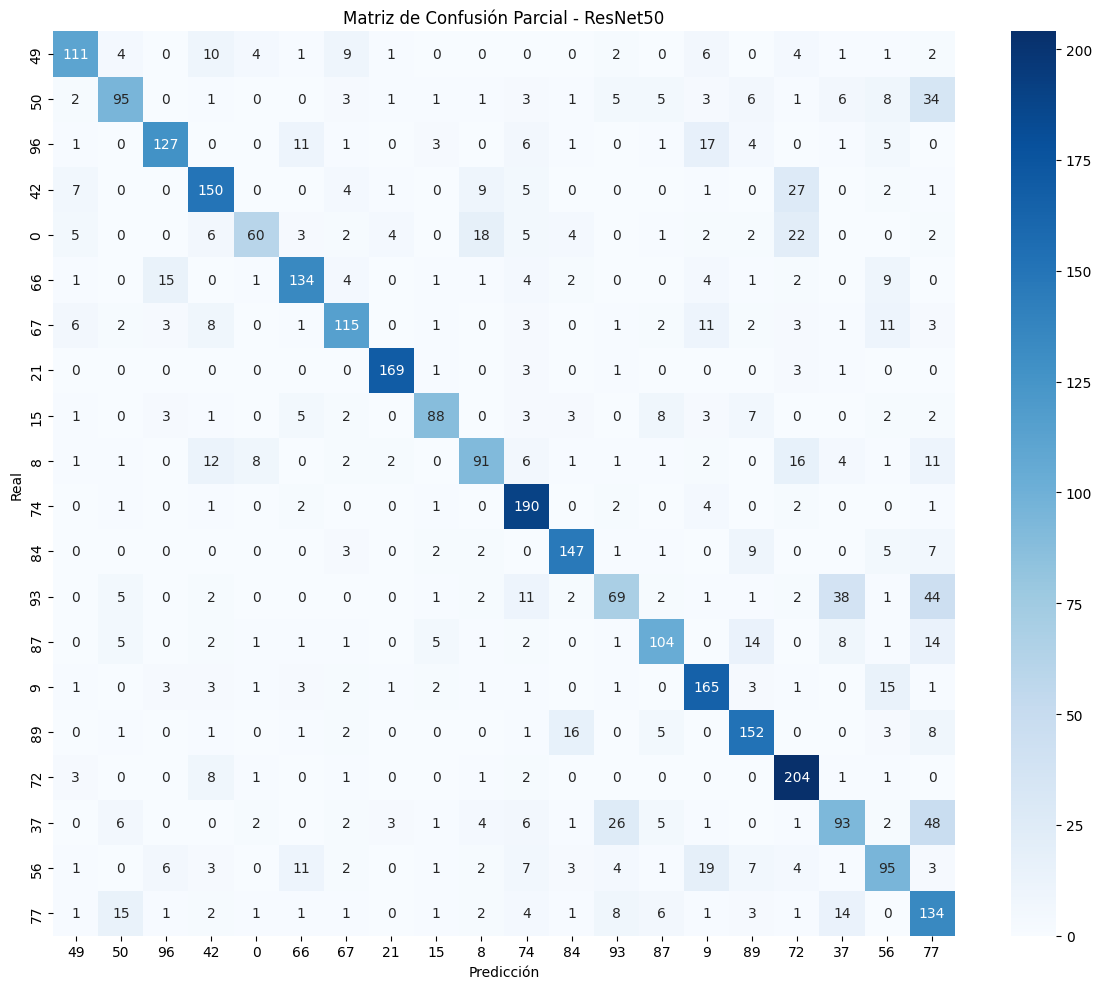

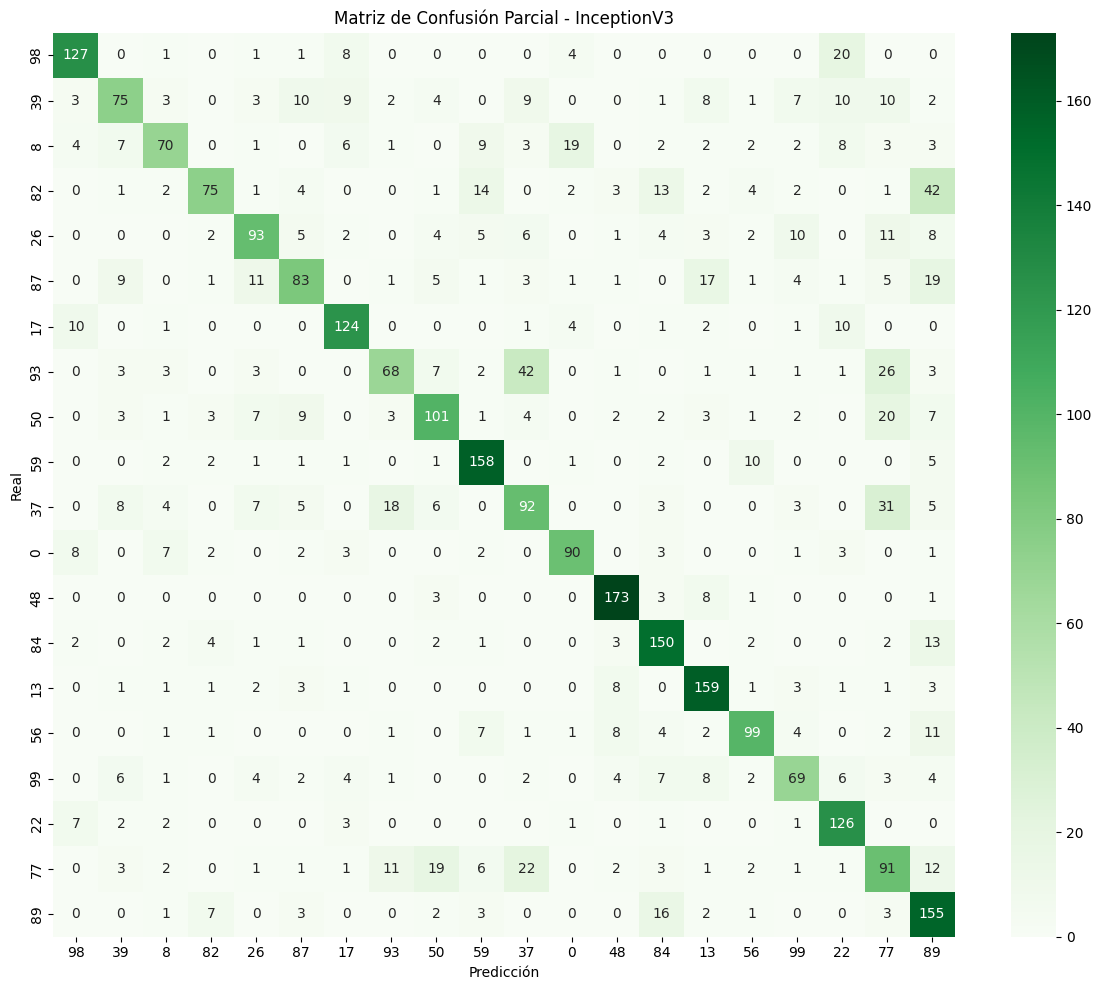

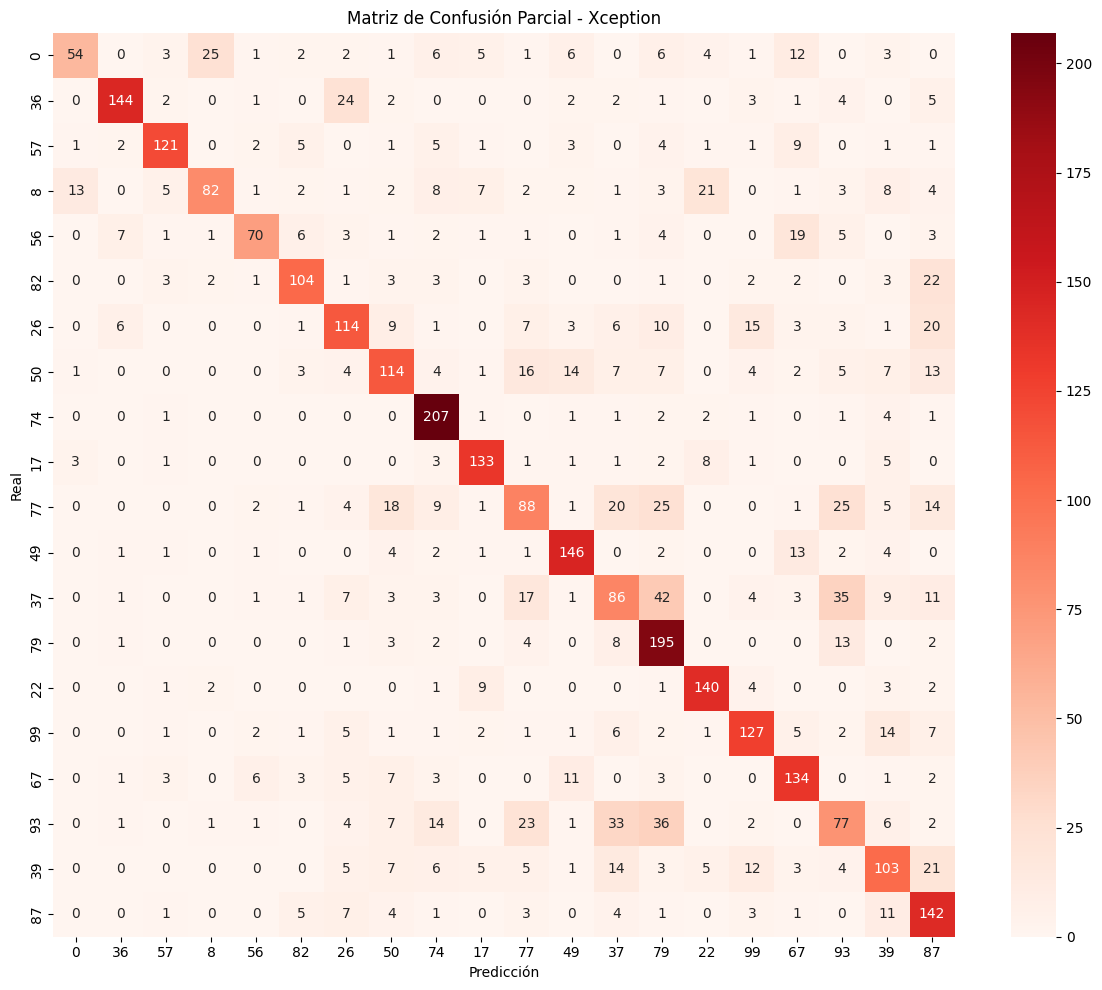

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Función para generar matriz parcial
def plot_top_misclassified(cm, title, top_n=20, cmap='Blues'):
    cm_no_diag = cm.copy()
    np.fill_diagonal(cm_no_diag, 0)
    misclassified_sums = cm_no_diag.sum(axis=1) + cm_no_diag.sum(axis=0)
    top_indices = np.argsort(misclassified_sums)[-top_n:]

    cm_top = cm[np.ix_(top_indices, top_indices)]

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_top, annot=True, fmt='d', cmap=cmap,
                xticklabels=top_indices, yticklabels=top_indices)
    plt.title(title)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

# MATRIZ DE CONFUSIÓN ORIGINAL
cm_res = confusion_matrix(y_true, y_pred_res)
cm_inc = confusion_matrix(y_true, y_pred_inc)
cm_xce = confusion_matrix(y_true, y_pred_xce)

# MATRICES PARCIALES
plot_top_misclassified(cm_res, "Matriz de Confusión Parcial - ResNet50", cmap="Blues")
plot_top_misclassified(cm_inc, "Matriz de Confusión Parcial - InceptionV3", cmap="Greens")
plot_top_misclassified(cm_xce, "Matriz de Confusión Parcial - Xception", cmap="Reds") 


In [16]:
from sklearn.metrics import matthews_corrcoef

# Calcular MCC para ResNet50
mcc_resnet = matthews_corrcoef(y_true, y_pred_res)
print(f"📈 MCC - ResNet50: {mcc_resnet:.4f}")

# Calcular MCC para InceptionV3
mcc_inception = matthews_corrcoef(y_true, y_pred_inc)
print(f"📈 MCC - InceptionV3: {mcc_inception:.4f}")

# Calcular MCC para Xception
mcc_xception = matthews_corrcoef(y_true, y_pred_xce)
print(f"📈 MCC - Xception: {mcc_xception:.4f}")

📈 MCC - ResNet50: 0.6324
📈 MCC - InceptionV3: 0.6347
📈 MCC - Xception: 0.6358


In [17]:
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

# Verificamos si cada modelo acertó o no
res_correct = y_pred_res == y_true  # ResNet50
inc_correct = y_pred_inc == y_true  # InceptionV3
xce_correct = y_pred_xce == y_true  # Xception

# Función para calcular la prueba de McNemar
def mcnemar_test(model_1_correct, model_2_correct, model_1_name, model_2_name):
    # Construir matriz de contingencia
    b = np.sum(model_1_correct & ~model_2_correct)
    c = np.sum(~model_1_correct & model_2_correct)
    contingency_table = [[0, b], [c, 0]]  # a y d no se usan en McNemar
    
    # Ejecutar prueba de McNemar
    result = mcnemar(contingency_table, exact=True)
    
    print(f"📊 McNemar test result: {model_1_name} vs {model_2_name}")
    print(f"Statistic={result.statistic}, p-value={result.pvalue:.5f}")
    
    # Interpretación
    if result.pvalue < 0.05:
        print("📌 Existe una diferencia estadísticamente significativa entre los modelos.")
    else:
        print("📌 No hay diferencia estadísticamente significativa entre los modelos.")
    print("\n")

# Comparar ResNet50 (res) vs InceptionV3 (inc)
mcnemar_test(res_correct, inc_correct, "ResNet50", "InceptionV3")

# Comparar ResNet50 (res) vs Xception (xce)
mcnemar_test(res_correct, xce_correct, "ResNet50", "Xception")

# Comparar InceptionV3 (inc) vs Xception (xce)
mcnemar_test(inc_correct, xce_correct, "InceptionV3", "Xception")

📊 McNemar test result: ResNet50 vs InceptionV3
Statistic=2724.0, p-value=0.44239
📌 No hay diferencia estadísticamente significativa entre los modelos.


📊 McNemar test result: ResNet50 vs Xception
Statistic=3059.0, p-value=0.28618
📌 No hay diferencia estadísticamente significativa entre los modelos.


📊 McNemar test result: InceptionV3 vs Xception
Statistic=2924.0, p-value=0.73445
📌 No hay diferencia estadísticamente significativa entre los modelos.


